In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
plt.style.use('default')

**Задание 9.1**

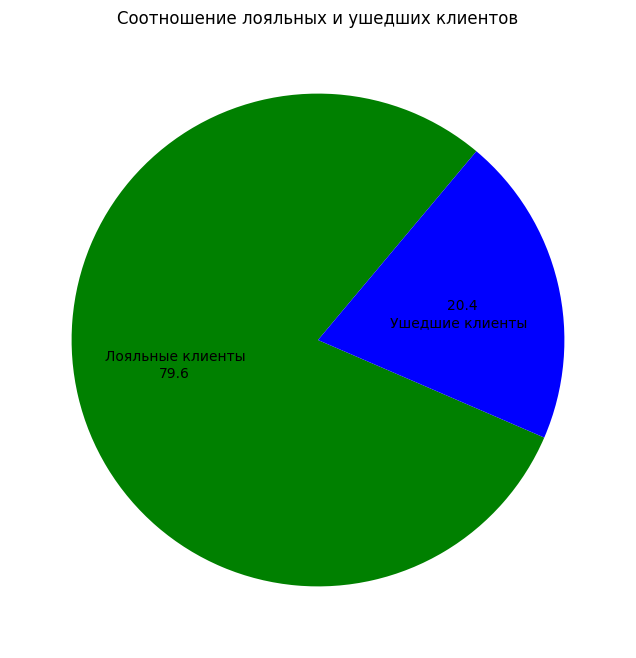

In [6]:


exited = churn_data['Exited'].value_counts()

exited.plot(
    kind='pie',
    figsize=(8,8),
    title='Соотношение лояльных и ушедших клиентов',
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    colors=['green', 'blue'],
    ylabel='',
    labeldistance=0.3,
    startangle=50,
    autopct=lambda x: round(x.sum(), 1),
);


Что тут можно сказать? Пятая часть клиентов банка уходит. Не могу сказать, много это или мало, но если банк нанимает меня для анализа, то, скорее всего, много. Необходимо дальнейшее исследование.

**Задание 9.2**

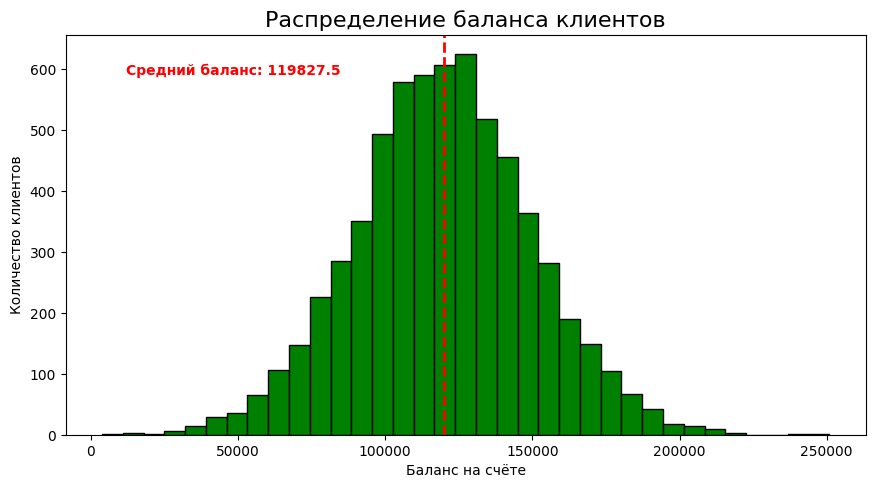

In [7]:
balance = churn_data[churn_data['Balance'] > 2500]['Balance']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(
    balance, 
    bins=35,
    color='green',
    edgecolor='black'
)
axes.set_title('Распределение баланса клиентов', fontsize=16)
axes.set_xlabel('Баланс на счёте')
axes.set_ylabel('Количество клиентов')


# Рисуем линию, обозначающую средний баланс, также указываем текстом значение
min_y, max_y = plt.ylim()
plt.axvline(
    balance.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2)
plt.text(
    balance.mean()*0.1,
    max_y*0.9,
    'Средний баланс: {:.1f}'.format(balance.mean()),
    color='red',
    fontweight='bold');

Распределение очень похоже на нормальное, средний баланс по счёту около 120к, разбросы есть, но несущественны. Чуть больше чем треть клиентов имеют нулевой баланс.

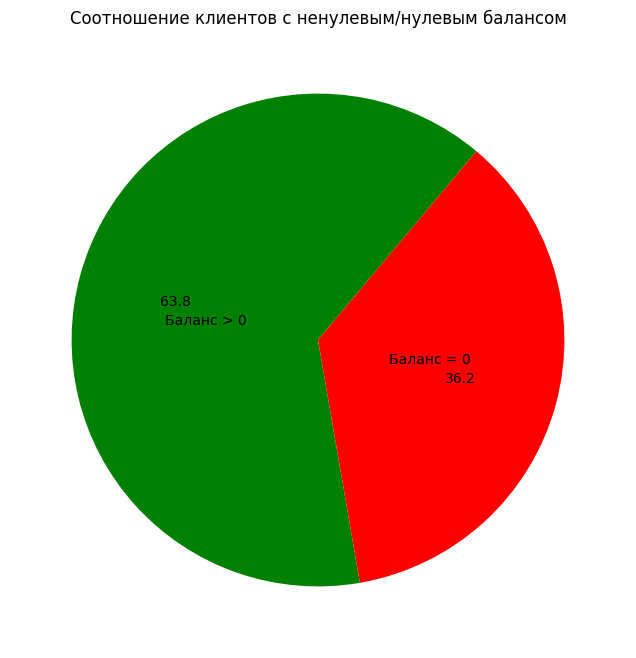

In [8]:
balance_zero = churn_data['Balance'].apply(lambda x: 1 if x>0 else 0).value_counts()
balance_zero.plot(
    kind='pie',
    figsize=(8,8),
    title='Соотношение клиентов с ненулевым/нулевым балансом',
    labels=['Баланс > 0', 'Баланс = 0'],
    colors=['green', 'red'],
    ylabel='',
    labeldistance=0.3,
    startangle=50,
    autopct=lambda x: round(x.sum(), 1),
);

**Задание 9.3**

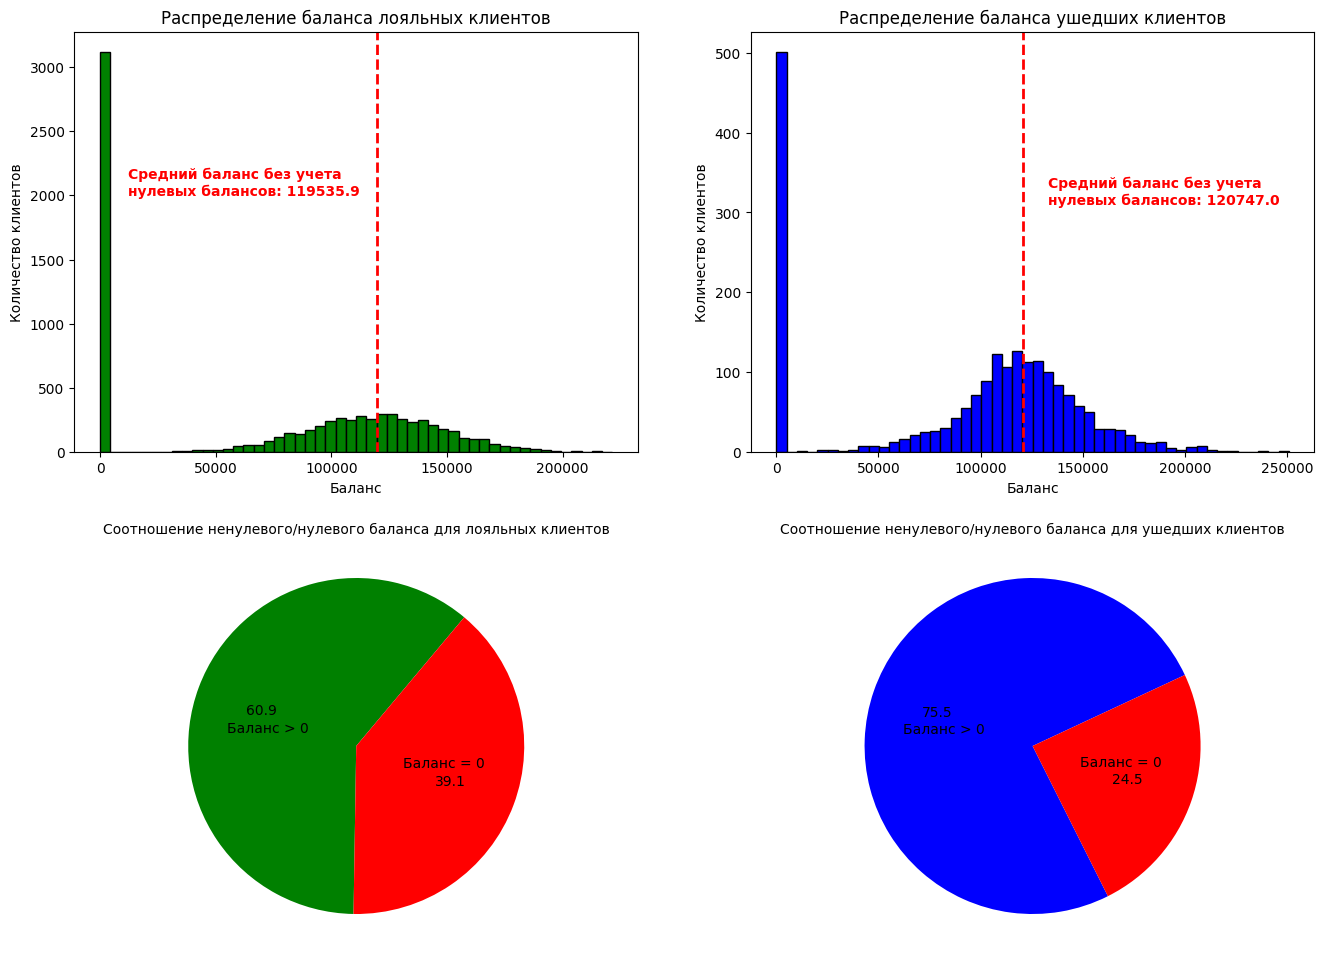

In [9]:
balance_loyal = churn_data[churn_data['Exited'] == 0]['Balance']
balance_exited = churn_data[churn_data['Exited'] == 1]['Balance']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

axes[0][0].hist(
    balance_loyal, 
    bins=50,
    color='green',
    edgecolor='black'
)
axes[0][0].set_title('Распределение баланса лояльных клиентов')
axes[0][0].set_xlabel('Баланс')
axes[0][0].set_ylabel('Количество клиентов')

axes[0][1].hist(
    balance_exited, 
    bins=50,
    color='blue',
    edgecolor='black'
)
axes[0][1].set_title('Распределение баланса ушедших клиентов')
axes[0][1].set_xlabel('Баланс')
axes[0][1].set_ylabel('Количество клиентов')

#средний баланс без учета нулевых балансов
axes[0][0].axvline(
    balance_loyal[balance_loyal > 0].mean(),
    ymin=0,
    ymax=1,
    color='red',
    linestyle='dashed',
    linewidth=2
)
axes[0][1].axvline(
    balance_exited[balance_exited > 0].mean(),
    ymin=0,
    ymax=1,
    color='red',
    linestyle='dashed',
    linewidth=2
)
axes[0][0].text(
    balance_loyal[balance_loyal > 0].mean()*0.1,
    2000,
    'Средний баланс без учета\nнулевых балансов: {:.1f}'.format(balance_loyal[balance_loyal > 0].mean()),
    color='red',
    fontweight='bold'
)
axes[0][1].text(
    balance_exited[balance_exited > 0].mean()*1.1,
    310,
    'Средний баланс без учета\nнулевых балансов: {:.1f}'.format(balance_exited[balance_exited > 0].mean()),
    color='red',
    fontweight='bold'
)

balance_loyal = balance_loyal.apply(lambda x: 1 if x > 0 else 0).value_counts()
balance_exited = balance_exited.apply(lambda x: 1 if x > 0 else 0).value_counts()

axes[1][0].pie(
    balance_loyal,
    colors=['green', 'red'],
    labels=['Баланс > 0', 'Баланс = 0'],
    labeldistance=0.3,
    autopct=lambda x: round(x.sum(), 1),
    startangle=50
)
axes[1][0].set_title('Соотношение ненулевого/нулевого баланса для лояльных клиентов', fontdict={'fontsize': 10}, pad=-20)

axes[1][1].pie(
    balance_exited,
    colors=['blue', 'red'],
    labels=['Баланс > 0', 'Баланс = 0'],
    labeldistance=0.3,
    autopct=lambda x: round(x.sum(), 1),
    startangle=25
)
axes[1][1].set_title('Соотношение ненулевого/нулевого баланса для ушедших клиентов', fontdict={'fontsize': 10}, pad=-20);

Распределение ненулевого баланса среди ушедших и лояльных клиентов визуально примерно одинаковое: нормальное распределение с примерно одним и тем же средним. Однако среди ушедших клиентов доля тех, кто не имел никаких средств на счёте, заметно меньше, чем среди лояльных. Вероятно это может быть связано с накопительными программами, которые предлагает банк. Возможно, другие банки предлагают лучшие уcловия.

**Задание 9.4**

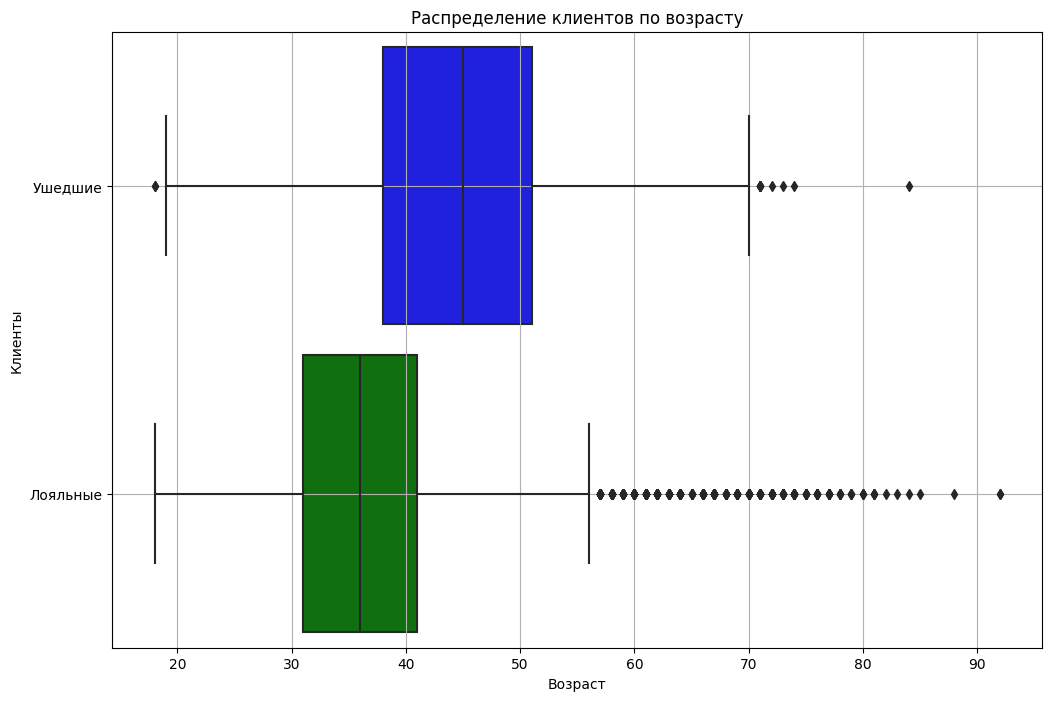

In [10]:
churn_data['Exited_Str'] = churn_data['Exited'].apply(lambda x: 'Ушедшие' if x==1 else 'Лояльные')

my_pal = {'Ушедшие':'b', 'Лояльные':'g'}

fig = plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited_Str',
    x='Age',
    orient='h',
    width=0.9,
    palette=my_pal
)
boxplot.set_title('Распределение клиентов по возрасту')
boxplot.set_xlabel('Возраст')
boxplot.set_ylabel('Клиенты')
boxplot.grid();



В группе лояльных клиентов количество выбросов заметно больше, значительная часть выбросов приходится на старшую возрастную категорию (55+). Также можно отметить, что ушедшие клиенты в основном старше, чем лояльные. Наше предположение, что отток клиентов связан в том числе с накоплениеями (старшему поколению это более актуально), получило дополнительное подтверждение. Банку стоит обратить внимание именно на старшую возрастную группу (40+).

**Задание 9.5**

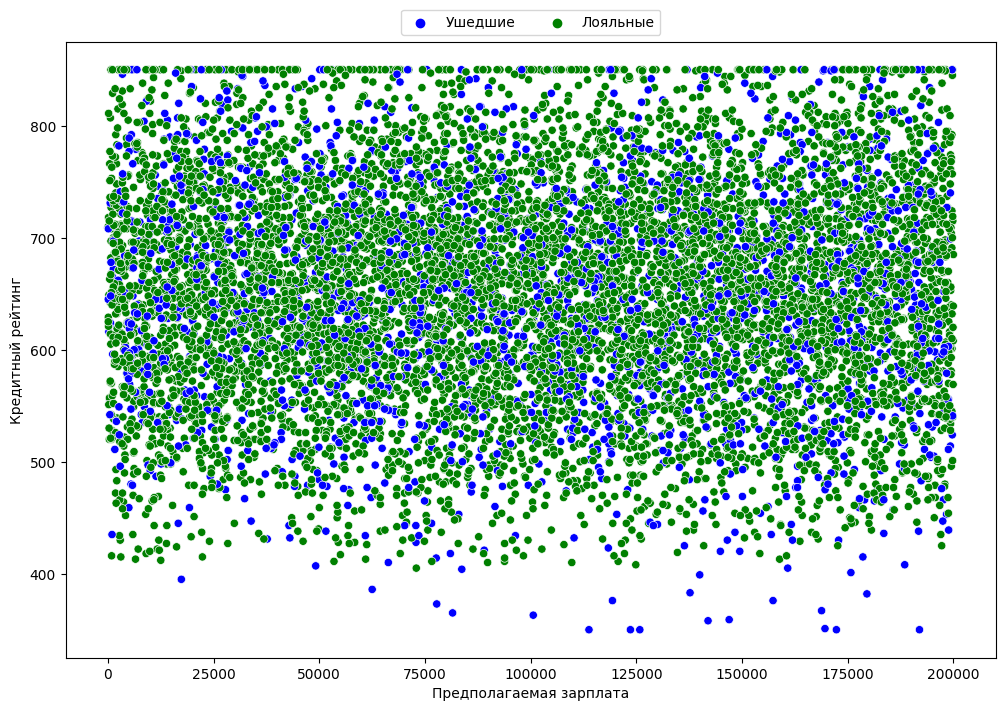

In [11]:
fig = plt.figure(figsize=(12, 8))

my_pal = {'Ушедшие':'b', 'Лояльные':'g'}

s_plot = sns.scatterplot(
    y='CreditScore', 
    x='EstimatedSalary', 
    data=churn_data,
    hue=churn_data['Exited_Str'],
    palette=my_pal
)
sns.move_legend(
    s_plot, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True,
)

plt.xlabel('Предполагаемая зарплата')
plt.ylabel('Кредитный рейтинг');

Судя по диаграмме, взаимосвязи между предполагаемой зарплатой и кредитным рейтингом нет.

**Задание 9.6**

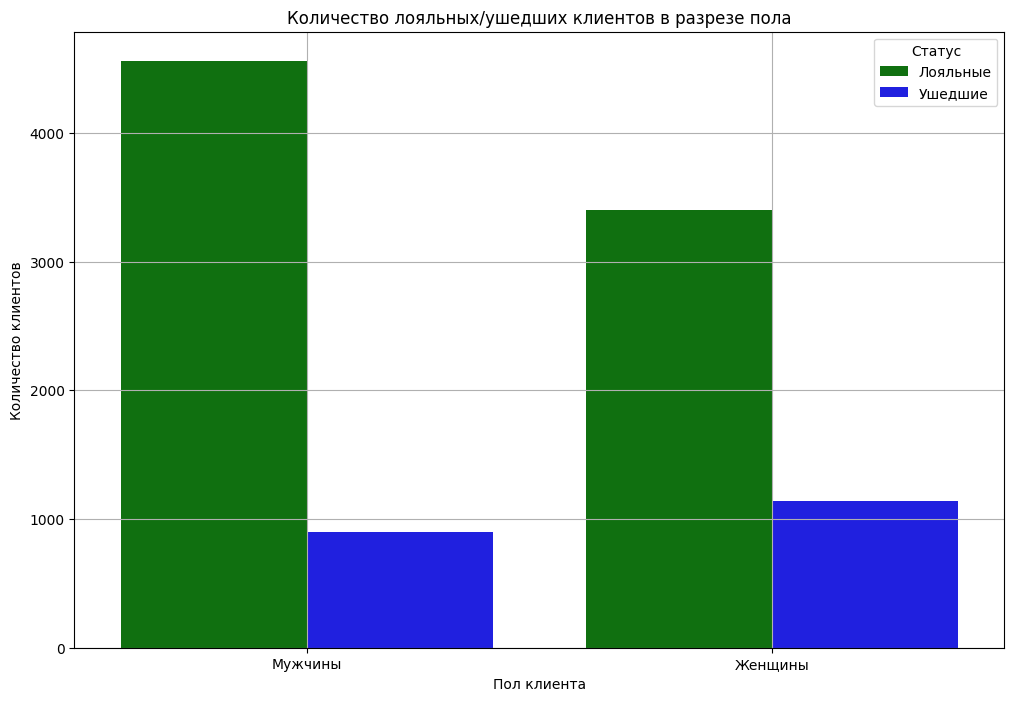

In [12]:
mask1 = churn_data['Gender'] == 'Male'
mask2 = churn_data['Gender'] == 'Female'
mask3 = churn_data['Exited_Str'] == 'Лояльные'
mask4 = churn_data['Exited_Str'] == 'Ушедшие'

exited_gender = pd.DataFrame(
    data=[
        ['Мужчины', 'Лояльные', churn_data[mask1 & mask3].shape[0]],
        ['Мужчины', 'Ушедшие', churn_data[mask1 & mask4].shape[0]],
        ['Женщины', 'Лояльные', churn_data[mask2 & mask3].shape[0]],
        ['Женщины', 'Ушедшие', churn_data[mask2 & mask4].shape[0]],    
    ],
    columns=['Пол', 'Статус', 'Количество']
)

fig = plt.figure(figsize=(12, 8))

my_pal = {'Ушедшие' :'b', 'Лояльные' :'g'}

barplot = sns.barplot(
    data=exited_gender,
    x='Пол',
    y='Количество',
    hue='Статус',
    palette=my_pal
)

barplot.set_title('Количество лояльных/ушедших клиентов в разрезе пола')
barplot.set_xlabel('Пол клиента')
barplot.set_ylabel('Количество клиентов')
barplot.grid();


Из графика видно, что женщины чаще перестают быть клиентами банка. Есть очень любопытная особенность: больше половины ушедших из банка - женщины. Интересно будет построить различные распределения по возрастам для женщин.

In [13]:
fig = px.histogram(
    data_frame=churn_data[churn_data['Gender']=='Female'],
    x='Age',
    height=800,
    width=1200,
    color='Exited',
#    text_auto=True,
#    nbins=20
)
fig.show()

In [14]:
pivot = churn_data[churn_data['Balance'] > 0].pivot_table(
    values=['Age','Balance'],
    index=['Gender','Exited_Str'],
    columns='Geography',
    aggfunc={'Age':['count',np.median],'Balance':np.mean},
    fill_value=0
)
pivot.round(1)

Age                                      Balance  \
                   count               median                    mean   
Geography         France Germany Spain France Germany Spain    France   
Gender Exited_Str                                                       
Female Лояльные      889     745   406     35      36    37  118360.2   
       Ушедшие       263     448   138     45      45    44  118507.1   
Male   Лояльные     1234     950   622     36      36    37  120295.1   
       Ушедшие       210     366   112     44      45    44  126184.7   

                                       
                                       
Geography           Germany     Spain  
Gender Exited_Str                      
Female Лояльные    118828.5  119601.9  
       Ушедшие     119673.9  120517.8  
Male   Лояльные    119896.5  119963.3  
       Ушедшие     121202.2  118897.8

**Задание 9.7**

In [15]:
client_products = churn_data.pivot_table(
    values='Age',
    index='Exited_Str',
    columns='NumOfProducts',
    aggfunc='count',
    fill_value=0
)

fig = px.bar(
    data_frame=client_products,
    height=800,
    width=1200,
    title='Распределение клиентов по приобретенным продуктам',
    barmode='group',
    labels={'value':'Количество клиентов', 'NumOfProducts':'Количество приобретенных продуктов', 'Exited_Str':'Клиенты'},
    text_auto=True  
)

#настраиваем легенду
fig.update_layout(legend=dict(
    orientation='h',
    yanchor='top',
    y=0.98,
    xanchor='right',
    x=0.99,
))

#настраиваем заголовок
fig.update_layout(
    title={
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
})

fig.show()

Из данного графика видно, что ушедшие клиенты покупали больше разнообразных банковских услуг. Следовательно, можно предположить, что одной из причин ухода клиентов является неудовлетворенность услугами, которые предоставляет банк. Предположение о том, что услуги банка по накоплению далеко не самые лучшие, получает дополнительное косвенное подтверждение. К сожалению, нет детализации услуг банка.

**Задание 9.8**

In [16]:
active_client = churn_data.pivot_table(
    values='Age',
    columns='Exited_Str',
    index='IsActiveMember',
    aggfunc='count',
    fill_value=0
)
active_client.rename(index={0:'Неактивный', 1:'Активный'},inplace=True)

In [17]:
fig = px.bar(
    data_frame=active_client,
    height=800,
    width=1200,
    title='Распределение клиентов по статусу активный/неактивный',
    barmode='group',
    labels={'value':'Количество клиентов', 'IsActiveMember':'Статус клиента', 'Exited_Str':'Клиенты'},
    text_auto=True,
    color='Exited_Str'
)
fig.update_layout(
    title={
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
})

fig.show()

Из графика можно сказать, что клиент с активным статусом менее склонен покинуть банк. Предположу, что активный статус даёт некоторые "плюшки". Что можно посоветовать банку? Можно попробовать чаще давать статус активных. Если есть порог вхождения - понизить его.

**Задание 9.9**

In [18]:
churn_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [19]:
country_dist = churn_data.pivot_table(
    values='Age',
    columns='Exited_Str',
    index='Geography',
    aggfunc='count',
    fill_value=0
)
country_dist.reset_index(inplace=True)
country_dist['Ratio'] = country_dist['Ушедшие'] / country_dist['Лояльные']
country_dist

Exited_Str,Geography,Лояльные,Ушедшие,Ratio
0,France,4204,810,0.192674
1,Germany,1695,814,0.480236
2,Spain,2064,413,0.200097


In [20]:
fig = px.choropleth(
    data_frame=country_dist,
    locations='Geography',
    locationmode = 'country names',
    color='Ratio',
    range_color=[0, 0.5],
    title='Отношение ушедшие/лояльные клиенты по странам',
    width=1200,
    height=600,
    color_continuous_scale='Reds',
    labels={'Ratio':'Отношение'}
)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
})

fig.show()

Банк обслуживает клиентов из трех стран - Испании, Франции, Германии. Как видно из карты, соотношение ушедшие/лояльные примерно одинаково для Франции и Испании, но отличается в 2 раза в худшую сторону для Германии. Предположу, что это может быть связано с пенсионной системой этих стран. Например, в Германии пенсионная нагрузка (отношение численности населения выше трудоспособного возраста к численности населения в трудоспособном возрасте) 31%, тогда как во Франции и Испании около 25%. Пенсионный возраст таков (муж/жен): 65-67/65-67 в Германии, 65/65 в Испании, 60/60 во Франции. Также можно отметить, что в Западной Германии женская пенсия заметно меньше мужской: около 1000 у мужчин, и 700 у женщин. Очень велика вероятность, что именно накопление является значимой услугой для клиентов.

Средние пенсии во всех этих странах примерно равны, также мы не берем в расчет стоимость жизни.

**Задание 9.10**

In [21]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [22]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
credit_pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0    
)
credit_pivot = credit_pivot.round(2)

In [23]:
fig = px.imshow(
    credit_pivot,
    width=1200,
    height=650,
    title='Тепловая карта зависимости кредитного рейтинга от срока пользования банком',
    labels=dict(x='Срок пользования банком, лет', y='Кредитный рейтинг', color='Доля ушедших клиентов'),
    color_continuous_scale='Viridis',
    text_auto=True
)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
})

fig.show()

Как мне кажется, довольно очевидные результаты. Наибольшая доля ушедших среди новых клиентов с очень низким кредитным рейтингом, наименьшая - среди клиентов с наивысшим кредитным рейтингом, которые пользуются услугами банка несколько лет.

**Результаты:**

Что можно посоветовать банку (с учётом того, что многих деталей мы не знаем):

1. Упростить получение статуса активного клиента. Если есть порог вхождения - снизить. Активнее информировать клиентов о преимуществах активного статуса.
2. Поработать над услугами. Многие клиенты ушли, попробовав больше услуг, чем постоянные клиенты. Проанализировать услуги конкурентов.
3. Улучшить услуги по накоплению (увеличить процент, добавить различных бонусов). Обратить внимание на категорию по возрасту 40+, т.к. это основная возрастная группа ушедших клиентов.